In [1]:
import pandas as pd
import torch
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\abtha\anaconda3\envs\new_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
tf.debugging.set_log_device_placement(True)

In [2]:
nRowsRead = 10000 # specify 'None' if want to read whole file
# test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 2 columns


In [3]:
df1.head()

,headline,article
0,"पठानकोट पहुंचे PM मोदी, एयरबेस का जायजा ले बॉर...",प्रधानमंत्री नरेंद्र मोदी पठानकोट एयरबेस पहुंच...
1,सचिन ने देशवासियों को समर्पित किया अपना दोहरा शतक,सचिन तेंदुलकर ने एकदिवसीय अंतरराष्ट्रीय क्रिके...
2,एनआईए करेगी छत्तीसगढ़ में सुरक्षा खामियों की ज...,केंद्रीय गृह राज्य मंत्री आर. पी. एन. सिंह ने ...
3,सीधी बात: शाह बोले- हमारा बस चलता तो अब तक मं...,भारतीय जनता पार्टी (बीजेपी) के राष्ट्रीय अध्यक...
4,"ऋषभ पंत के पास यूनिक टैलेंट, उसके साथ छेड़छाड़ न...",ऋषभ पंत की कभी कभार इस बात के लिए आलोचना की जा...


In [4]:
nRowsRead = 100000 # specify 'None' if want to read whole file
# train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'train.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 2 columns


In [5]:
df.head(5)

,headline,article
0,EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1,जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2,UN में पाकिस्तान की राजदूत मलीहा लोधी ने कराई ...,पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3,38 देशों में पीएम नरेंद्र मोदी बायोपिक को रिली...,पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4,13 अगस्त 2011: दिनभर की बड़ी खबरें पढ़ें,"देश, दुनिया, महानगर, खेल, आर्थिक और बॉलीवुड मे..."


In [6]:
df.describe()

,headline,article
count,99992,100000
unique,99510,99987
top,Tech Wrap: यहां जानें आज की 5 बड़ी खबरें,हमारे साझेदार 'अनरियल टाइम्स' की खास व्यंग्यात...
freq,159,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  99992 non-null   object
 1   article   100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [8]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = text.replace('\t', '')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
        
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    #text = text.split(' ')
    #text = [x for x in text if(x!='')]
    #text.insert(0,'<sos>')
    #text.insert(len(text),'<eos>')
    return text

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [10]:
train_data_src = df['headline']
train_data_trg = df['article']

In [11]:
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are headlines
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg] # these are articles

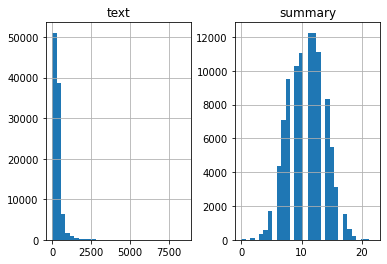

In [12]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_trg:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_src:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [13]:
df['Text_Cleaned'] = tokenized_corpus_trg  
print("::::: Text_Cleaned :::::")
print(df['Text_Cleaned'][0:5], "\n")


df['Summary_Cleaned'] =  tokenized_corpus_src 
print("::::: Summary :::::")
print(df['Summary_Cleaned'][0:5], "\n")

corpus = list(df['Text_Cleaned'])

::::: Text_Cleaned :::::
0    दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1    जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2    पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3    पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4    देश दुनिया महानगर खेल आर्थिक और बॉलीवुड में क्...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0     दिल्ली में डीजल टैक्सियों पर बैन से मुश्किल म...
1    जॉर्डन राष्ट्रपति मुखर्जी ने करोड़ डॉलर के संय...
2     में पाकिस्तान की राजदूत मलीहा लोधी ने कराई फज...
3     देशों में पीएम नरेंद्र मोदी बायोपिक को रिलीज ...
4                      अगस्त दिनभर की बड़ी खबरें पढ़ें
Name: Summary_Cleaned, dtype: object 



In [14]:
print(df['Text_Cleaned'][0])

दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को बंद करने के फैसले के बाद हजारों टैक्सी ड्राइवरों की रोजी रोटी पर तो असर पड़ा ही है लेकिन अब दिल्ली पर एक और नई मुसीबत आ गई है चुनाव आयोग राजधानी के वार्ड में उपचुनाव करवा रहा है लेकिन चुनावों से दो हफ्ते पहले चुनाव आयोग में कामकाज ठप्प हो गया है कमीशन ने किराए पर ली थी डीजल गाड़ियांदरअसल कमीशन ने लगभग सौ गाड़ियां चुनाव के कामकाज को करने के लिए किराए पर लीं जिनमें सभीडीज़ल से चलने वाली टैक्सीथी इन्हीं टैक्सियों से चुनाव अधिकारी से लेकर चुनावों का जिम्मा संभालने वाले बाकी कर्मचारी भी एक जगह से दूसरी जगह आते जाते थे अचानक चुनावों से ठीक पहले आई इस परेशानी ने दिल्ली चुनाव आयोग का कामकाज ही ठप्प कर दिया है रियायत के लिए की जा सकती है मांगदिल्ली के राज्य चुनाव अधिकारी राकेश मेहता ने इस मुश्किल का रास्ता निकालने के लिए मंगलवार को दिल्ली के पुलिस कमिश्नर और ट्रांसपोर्ट कमिश्नर की बैठक बुलाई है इस बैठक में राज्य चुनाव आयुक्त मई को होने वाले चुनावों को लेकरगाड़ियों की उपलब्धताको लेकर पुलिस और सरकार से समाधान निकालने के लिए भी कहेंगे चुनाव आयोग इन दो

In [15]:
print(df['Summary_Cleaned'][0])

 दिल्ली में डीजल टैक्सियों पर बैन से मुश्किल में पड़ा चुनाव आयोग


In [16]:
text_count = []
summary_count = []

for sent in df['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in df['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [17]:
graph_df['text'].describe()

count    100000.000000
mean        345.238200
std         308.739341
min           0.000000
25%         195.000000
50%         280.000000
75%         395.000000
max        8505.000000
Name: text, dtype: float64

In [18]:
graph_df['summary'].describe()

count    100000.00000
mean         10.84903
std           2.97927
min           0.00000
25%           9.00000
50%          11.00000
75%          13.00000
max          22.00000
Name: summary, dtype: float64

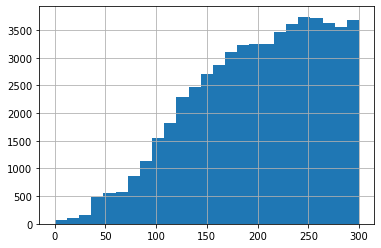

In [19]:
graph_df['text'].hist(bins = 25, range=(0, 300))
plt.show()

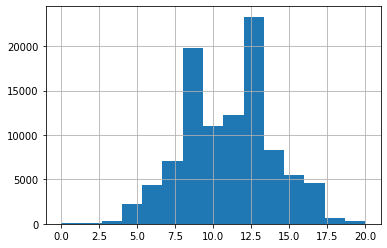

In [20]:
graph_df['summary'].hist(bins = 15, range=(0, 20))
plt.show()

In [21]:
count = 0
for i in graph_df['text']:
    if i > 10 and i <= 300:
        count = count + 1
print(count / len(graph_df['text']))

0.55835


In [22]:
count = 0
for i in graph_df['summary']:
    if i > 1 and i <= 16:
        count = count + 1
print(count / len(graph_df['summary']))

0.97472


In [23]:
max_text_len = 300
max_summary_len = 16

In [24]:
cleaned_text = np.array(df['Text_Cleaned'])
cleaned_summary = np.array(df['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len 
       and len(cleaned_summary[i].split()) > 1 
       and len(cleaned_text[i].split()) <= max_text_len ):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [25]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [26]:
post_pre.shape

(54952, 2)

In [27]:
post_pre.shape

(54952, 2)

In [28]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

# train test split
x_tr,x_test,y_tr,y_test = train_test_split(np.array(post_pre['text']),
                                         np.array(post_pre['summary']),
                                         test_size = 0.2,
                                         random_state = 0,
                                         shuffle = True)
# train validation split
x_tr,x_val,y_tr,y_val = train_test_split(x_tr,
                                         y_tr,
                                         test_size = 0.2,
                                         random_state = 0,
                                         shuffle = True)

In [29]:
x_tr.shape

(35168,)

In [30]:
x_test.shape

(10991,)

In [31]:
x_val.shape

(8793,)

In [32]:
# Tokenize text to get the vocab count
#prepare a tokenizer for training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [33]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 77.17079038460308
Total Coverage of rare words: 2.1891748297952827


In [34]:
import seaborn as sns
from time import time

In [35]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 35681


In [36]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words = tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 35681


In [37]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [38]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [39]:
from tensorflow.keras.backend import clear_session
# import gensim
import re
# from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
# from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [40]:
print(f"Size of vocabulary from the w2v model = {x_voc}")

clear_session()

latent_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 35681
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 100)     3568100     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 300, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

In [41]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [42]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [48]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [51]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5



In [57]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [58]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=1,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [61]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [62]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [63]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")